In [2]:
import imageio
import matplotlib.pyplot as plt
import numpy as np

In [3]:
im = imageio.imread("sky.jpg")
im_type = im.dtype
im = im.astype(np.float64)
rows,cols = im.shape[:2]
im_stacked = im.reshape(rows,-1)

In [29]:
U,S,V = np.linalg.svd(im_stacked,full_matrices = False)
W = np.random.rand(rows,rows)
a = 1
Aw = np.diag(S)+a*W
Uw,Sw,Vw = np.linalg.svd(Aw,full_matrices = True)

In [30]:
marked = U @ np.diag(Sw) @ V
im_marked = marked.reshape(rows, cols, -1)
im_marked = im_marked.astype(im_type)

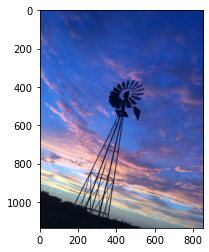

In [31]:
plt.imshow(im_marked)
#plt.imshow(im_stacked.reshape(rows, cols, -1).astype(im_type))

In [32]:
# extraction
Um, Sm, Vm = np.linalg.svd(marked)
M = (Uw @ np.diag(Sm) @ Vw - np.diag(S))/a

In [33]:
np.linalg.norm(M-W)

5.178104914542945e-10